# <center> Практическая работа №2 </center>
## <center> Маркетинговая кампания сети быстрого питания

Группа: ММР212            
Выполнила: Шубина Анастасия

<a id='Content'></a>
## Оглавление
- [Импорт пакетов](#Packages)
- [Описание данных](#Variables)
- [Чтение набора данных](#Dataset)
- [Предварительный анализ данных](#EDA)
- [Тестирование](#Tests)
 - [Тест Тьюки](#TestTukey)
 - [U-тест Манна-Уитни](#UTest)
- [Вывод](#Сonclusion)

<a id='Packages'></a>
## Импорт пакетов
[Наверх](#Content)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.factorplots import interaction_plot
%matplotlib inline

<a id='Variables'></a>
    
## Описание данных
[Наверх](#Content)

[Источник](https://www.kaggle.com/datasets/chebotinaa/fast-food-marketing-campaign-ab-test)

| Имя переменной | Описание |
|:-- | :-- |
| MarketID |Уникальный индетификатор рынка |
| MarketSize |Размер рынка по объёму продаж |
| LocationID |Уникальный индетификатор для точки продаж |
| AgeOfStore |Возраст точки в годах |
| Promotion |Одна из трёх протестированных кампаний |
| week |Одна из четырёх недель, когда проводилась кампания |
| SalesInThousands |Объём продаж для определённых LocationID, Promotion и week |

<a id='Dataset'></a>
## Чтение набора данных
[Наверх](#Content)

In [2]:
#Чтение данных
fastfood_df = pd.read_csv('WA_Marketing-Campaign.csv', sep=',')

In [3]:
# Установка глобальных стилей для графиков
colors = ['#464776', '#746BB9', '#EFB5C3', '#EFF2CF', '#E4D7F0']
sns.set_style('white')
plt.rc('axes', titlesize=13)
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)
plt.rc('legend', fontsize=11)
plt.rc('font', size=10)

<a id='EDA'></a>
## Предварительный анализ данных
[Наверх](#Content)

In [4]:
fastfood_df.head(10)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
5,1,Medium,2,5,2,2,34.67
6,1,Medium,2,5,2,3,27.98
7,1,Medium,2,5,2,4,27.72
8,1,Medium,3,12,1,1,44.54
9,1,Medium,3,12,1,2,37.94


In [5]:
fastfood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


Исходя из информации выше в датасете: 7 столбцов и 548 строк.    
1 переменная является строковым типом данных, 5 переменных - целочисленный тип и 1 переменная с плавающей точкой.

In [6]:
fastfood_df.isnull().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

Кол-во пустых значений

In [7]:
#5. Работа с пропущенными значениями
dupl = sum(fastfood_df.duplicated())
print(f"Кол-во дублированных записей в датасете: {dupl}")

Кол-во дублированных записей в датасете: 0


In [8]:
fastfood_df.groupby('Promotion')['SalesInThousands'].describe()

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,58.099012,16.553782,30.81,46.3525,55.385,63.6175,99.65
2,188.0,47.329415,15.108955,17.34,38.1700,45.385,51.7450,88.64
3,188.0,55.364468,16.766231,22.18,44.1975,51.165,61.7325,96.48


In [9]:
fastfood_df.nunique()

MarketID             10
MarketSize            3
LocationID          137
AgeOfStore           25
Promotion             3
week                  4
SalesInThousands    517
dtype: int64

Кол-во уникальных значений в каждом столбце

In [10]:
fastfood_df.groupby(["Promotion", "MarketSize"]).count()["MarketID"]

Promotion  MarketSize
1          Large          56
           Medium         96
           Small          20
2          Large          64
           Medium        108
           Small          16
3          Large          48
           Medium        116
           Small          24
Name: MarketID, dtype: int64

Данные о продажах в зависимости от метода продвижения и размера рынка

<AxesSubplot:xlabel='Promotion'>

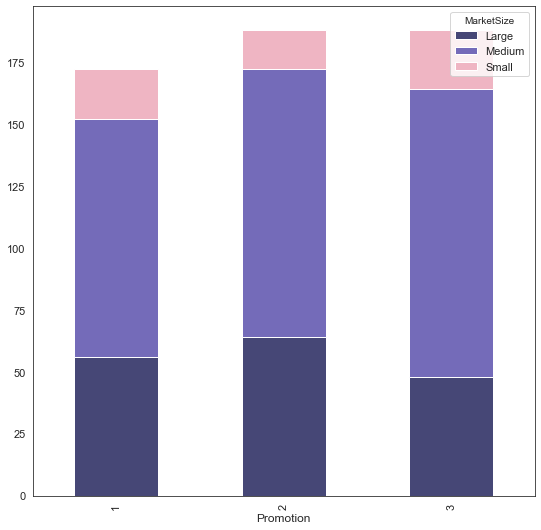

In [11]:
fastfood_df.groupby(['Promotion', 'MarketSize']).size().unstack().plot(kind='bar', figsize=(9,9), 
                                                                       stacked=True, color=colors)

<AxesSubplot:ylabel='SalesInThousands'>

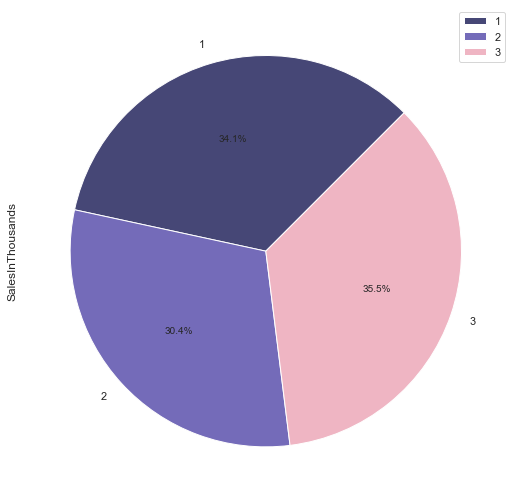

In [12]:
fastfood_df.groupby('Promotion').sum().plot(kind='pie', y='SalesInThousands', startangle=45,
                                                  figsize=(9,9), autopct='%1.1f%%', colors=colors)

<AxesSubplot:>

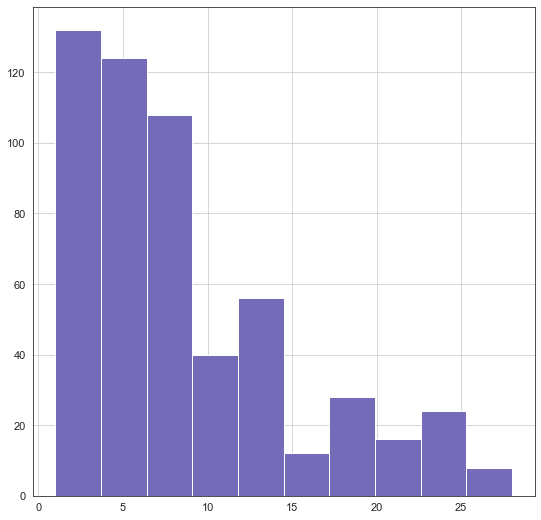

In [13]:
fastfood_df['AgeOfStore'].hist(color=colors[1], figsize=(9,9))

Уровень продвижения в зависимости от возраста точки

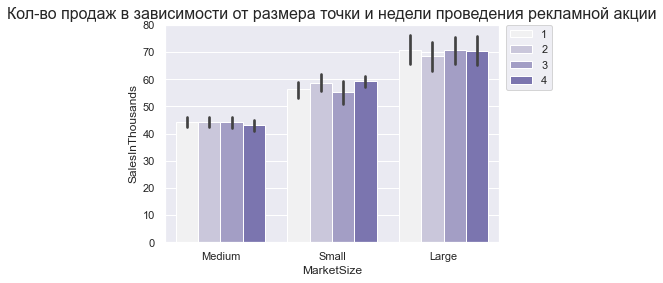

In [14]:
sns.set(font_scale=1)
sns.barplot(x='MarketSize', y='SalesInThousands', data=fastfood_df, hue='week', color=colors[1])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Кол-во продаж в зависимости от размера точки и недели проведения рекламной акции", fontdict={'fontsize': 16})
plt.show()

Исходя из данных выше можно понять, что в каждом размеры рынка нет сильной разницы в зависимости от недели.

In [15]:
fastfood_df.groupby('MarketID')['SalesInThousands'].apply(stats.zscore)

0     -0.198785
1      0.082351
2     -0.879890
3      0.601150
4     -1.056687
         ...   
543    1.492358
544   -0.505223
545   -1.133882
546   -1.340138
547   -0.616827
Name: SalesInThousands, Length: 548, dtype: float64

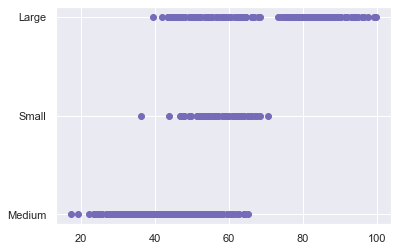

In [16]:
plt.scatter(fastfood_df['SalesInThousands'], fastfood_df['MarketSize'], c=colors[1])

<AxesSubplot:xlabel='SalesInThousands', ylabel='Count'>

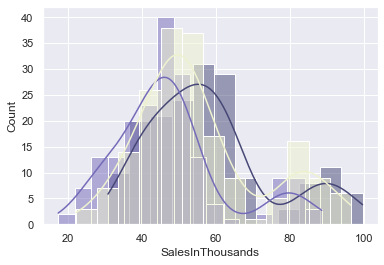

In [17]:
sns.histplot(fastfood_df[fastfood_df['Promotion'] == 1]['SalesInThousands'], kde=True, color=colors[0])
sns.histplot(fastfood_df[fastfood_df['Promotion'] == 2]['SalesInThousands'], kde=True, color=colors[1])
sns.histplot(fastfood_df[fastfood_df['Promotion'] == 3]['SalesInThousands'], kde=True, color=colors[3])

Исходя из выше указанной гистограммы мы видим, что данные распределены не равномерно.

<a id='Tests'></a>
## Тестирование гипотез
[Наверх](#Content)

<a id='TestTukey'></a>
### Тест Тьюки

In [18]:
def tukey_test(table, var):
    tukey = pairwise_tukeyhsd(endog=fastfood_df['SalesInThousands'],
                              groups=fastfood_df['Promotion'],
                              alpha=0.05)
    print(tukey)
    tukey.plot_simultaneous() 
    title="Сравнение между рекламными акциями в " + var
    plt.title(title)
    plt.xlabel("Продажи в тысячах")
    plt.ylabel("Рекламные акции")
    plt.show()

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2 -10.7696    0.0 -14.7738 -6.7654   True
     1      3  -2.7345 0.2444  -6.7388  1.2697  False
     2      3   8.0351    0.0   4.1208 11.9493   True
-----------------------------------------------------


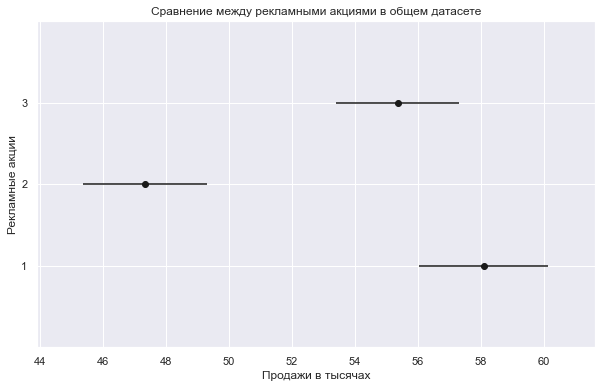

In [19]:
tukey_test(fastfood_df,"общем датасете")

In [20]:
MS_Small=fastfood_df[fastfood_df['MarketSize'] =='Small']
MS_Medium=fastfood_df[fastfood_df['MarketSize'] =='Medium']
MS_Large=fastfood_df[fastfood_df['MarketSize'] =='Large']

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2 -10.7696    0.0 -14.7738 -6.7654   True
     1      3  -2.7345 0.2444  -6.7388  1.2697  False
     2      3   8.0351    0.0   4.1208 11.9493   True
-----------------------------------------------------


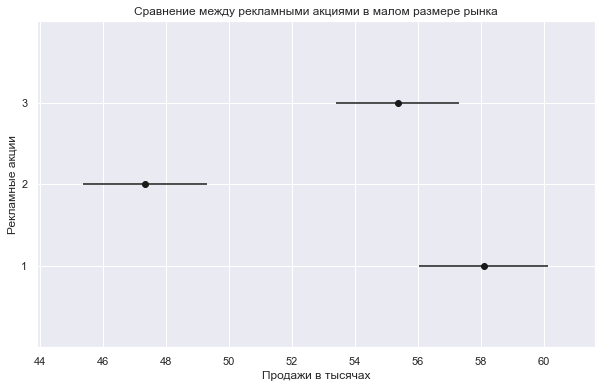

In [21]:
tukey_test(MS_Small,"малом размере рынка")

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2 -10.7696    0.0 -14.7738 -6.7654   True
     1      3  -2.7345 0.2444  -6.7388  1.2697  False
     2      3   8.0351    0.0   4.1208 11.9493   True
-----------------------------------------------------


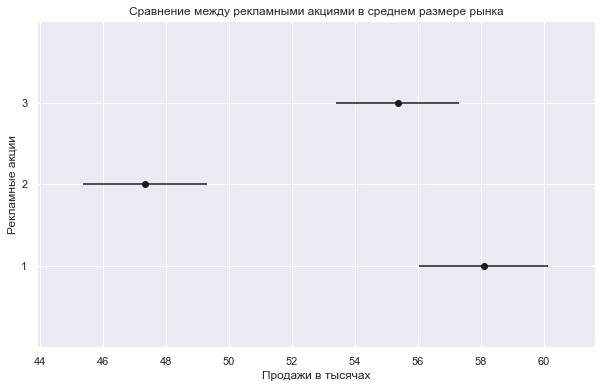

In [22]:
tukey_test(MS_Medium,"среднем размере рынка")

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2 -10.7696    0.0 -14.7738 -6.7654   True
     1      3  -2.7345 0.2444  -6.7388  1.2697  False
     2      3   8.0351    0.0   4.1208 11.9493   True
-----------------------------------------------------


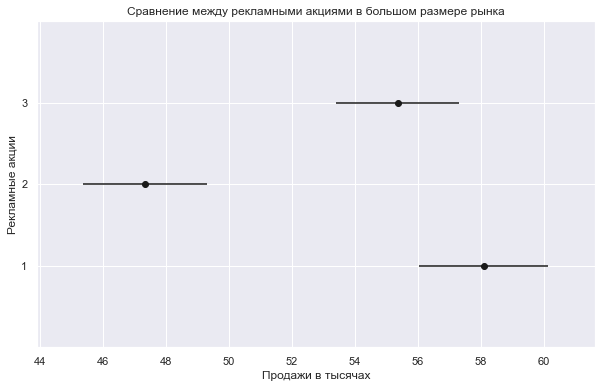

In [23]:
tukey_test(MS_Large,"большом размере рынка")

<a id='UTest'></a>
### U-тест Манна-Уитни
[Наверх](#Content)

In [24]:
stats.mannwhitneyu(fastfood_df[fastfood_df['Promotion'] == 1]['SalesInThousands'], 
                   fastfood_df[fastfood_df['Promotion'] == 2]['SalesInThousands'], 
                   alternative='two-sided')

MannwhitneyuResult(statistic=22957.5, pvalue=5.845935246838518e-12)

In [25]:
stats.mannwhitneyu(fastfood_df[fastfood_df['Promotion'] == 1]['SalesInThousands'], 
                   fastfood_df[fastfood_df['Promotion'] == 3]['SalesInThousands'], 
                   alternative='two-sided')

MannwhitneyuResult(statistic=18247.0, pvalue=0.035084095693231204)

In [26]:
stats.mannwhitneyu(fastfood_df[fastfood_df['Promotion'] == 2]['SalesInThousands'], 
                   fastfood_df[fastfood_df['Promotion'] == 3]['SalesInThousands'], 
                   alternative='two-sided')

MannwhitneyuResult(statistic=12093.0, pvalue=1.1970084441651803e-07)

<a id='Сonclusion'></a>
## Вывод
[Наверх](#Content)

Вывод, полученный из расчета с использованием t-критерия Стьюдента, заключается в том, что рекламные материалы  1 и 3 существенно лучше оказывают влияние на уровень продаж новых позиций меню компании быстрого питания чем рекламный материал 2. Следует испольовать именно их.